# Generating demographic summary statistics

In [27]:
from video_analytics import *
from pymongo import MongoClient
from collections import defaultdict
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
mc = MongoClient()
if 'store_name' in mc.database_names():
    mc.drop_database('store_name')
store_db = mc['store_name']
store_collections = store_db['storefront']

In [21]:
# Each result has a timestamp in it, the timestamps are not unique, repeat for people
results = get_results()
for result in results:
    store_collections.insert_one(result)

Start Job Id: 1544d7c9417f21925f51f27324c04b0c563167ab7a8476ad404a33c316405c07
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
..................

In [32]:
store_collections.find_one()

{'_id': ObjectId('5c0359bca73b06763844fe53'),
 'Timestamp': 3399,
 'Person': {'Index': 0,
  'Face': {'BoundingBox': {'Width': 0.04350563883781433,
    'Height': 0.10501418262720108,
    'Left': 0.07540211826562881,
    'Top': 0.25185006856918335},
   'AgeRange': {'Low': 48, 'High': 68},
   'Smile': {'Value': True, 'Confidence': 97.1988754272461},
   'Eyeglasses': {'Value': False, 'Confidence': 100.0},
   'Sunglasses': {'Value': False, 'Confidence': 100.0},
   'Gender': {'Value': 'Male', 'Confidence': 93.65911865234375},
   'Beard': {'Value': False, 'Confidence': 91.30879974365234},
   'Mustache': {'Value': False, 'Confidence': 99.90252685546875},
   'EyesOpen': {'Value': False, 'Confidence': 95.94684600830078},
   'MouthOpen': {'Value': False, 'Confidence': 57.76811981201172},
   'Emotions': [{'Type': 'HAPPY', 'Confidence': 46.93202209472656},
    {'Type': 'CALM', 'Confidence': 7.430604934692383},
    {'Type': 'DISGUSTED', 'Confidence': 16.845468521118164},
    {'Type': 'CONFUSED', 'Co

# Person and face traffic v/s timestamp

In [100]:
# Youth [0 - 18) years
# Adult [18 - 60) years
# Seniors > 60 years
timestamp_face_count_dict, timestamp_person_count_dict, timestamp_male_count_dict, timestamp_female_count_dict, timestamp_youth_count_dict, timestamp_adult_count_dict, timestamp_seniors_count_dict, timestamp_happy_count_dict, timestamp_calm_count_dict, timestamp_disgusted_count_dict,timestamp_confused_count_dict, timestamp_surprised_count_dict, timestamp_sad_count_dict, timestamp_angry_count_dict  = [defaultdict(int)] * 14

for result in results:
    timestamp = result['Timestamp']
    
    timestamp_person_count_dict[timestamp] += 1
    
    if 'Face' in result['Person']:
        timestamp_face_count_dict[timestamp] += 1
        
        # Male count
        if result['Person']['Face']['Gender']['Value'] == 'Male' and result['Person']['Face']['Gender']['Confidence'] >= 75:
            timestamp_male_count_dict[timestamp] += 1
        
        # Female count
        if result['Person']['Face']['Gender']['Value'] == 'Female' and result['Person']['Face']['Gender']['Confidence'] >= 75:
            timestamp_female_count_dict[timestamp] += 1 
            
        
        avg_age = (result['Person']['Face']['AgeRange']['Low'] + result['Person']['Face']['AgeRange']['High']) / 2
        
        # Youth count
        if avg_age >= 0 and avg_age < 18:
            timestamp_youth_count_dict[timestamp] += 1 
        # Adult count
        elif avg_age >= 18 and avg_age < 60:
            timestamp_adult_count_dict[timestamp] += 1
        # Seniors count
        else:
            timestamp_seniors_count_dict[timestamp] += 1 
            
        # most likely mood count
        most_likely_mood = max(result['Person']['Face']['Emotions'], key=lambda x:x['Confidence'])['Type']
        
        if most_likely_mood == 'HAPPY':
            timestamp_happy_count_dict[timestamp] += 1
        elif most_likely_mood == 'CALM':
            timestamp_calm_count_dict[timestamp] += 1
        elif most_likely_mood == 'DISGUSTED':
            timestamp_disgusted_count_dict[timestamp] += 1
        elif most_likely_mood == 'CONFUSED':
            timestamp_confused_count_dict[timestamp] += 1
        elif most_likely_mood == 'SURPRISED':
            timestamp_surprised_count_dict[timestamp] += 1
        elif most_likely_mood == 'SAD':
            timestamp_sad_count_dict[timestamp] += 1
        else:
            timestamp_angry_count_dict[timestamp] += 1
            
    else:
        timestamp_face_count_dict[timestamp], timestamp_person_count_dict[timestamp], timestamp_male_count_dict[timestamp], timestamp_female_count_dict[timestamp], timestamp_youth_count_dict[timestamp], timestamp_adult_count_dict[timestamp], timestamp_seniors_count_dict[timestamp], timestamp_happy_count_dict[timestamp], timestamp_calm_count_dict[timestamp], timestamp_disgusted_count_dict[timestamp],timestamp_confused_count_dict[timestamp], timestamp_surprised_count_dict[timestamp], timestamp_sad_count_dict[timestamp], timestamp_angry_count_dict[timestamp]  = [0] * 14


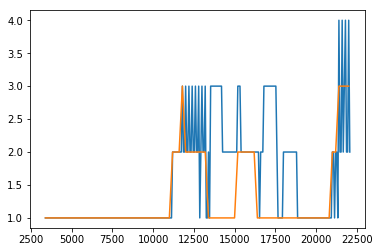

In [36]:
# Person and face traffic
plt.plot(list(map(int, timestamp_person_count_dict.keys())), timestamp_person_count_dict.values(),list(map(int, timestamp_face_count_dict.keys())), timestamp_face_count_dict.values())

# Gender Composition

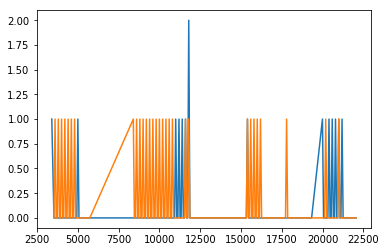

In [42]:
plt.plot(list(map(int, timestamp_male_count_dict.keys())), timestamp_male_count_dict.values(),
         list(map(int, timestamp_female_count_dict.keys())), timestamp_female_count_dict.values())

# Age Composition

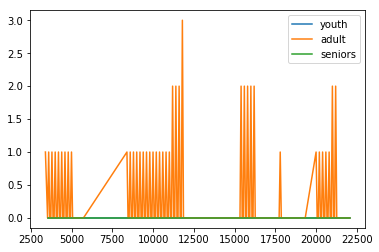

In [54]:
plt.plot(list(map(int, timestamp_youth_count_dict.keys())), timestamp_youth_count_dict.values(),
         list(map(int, timestamp_adult_count_dict.keys())), timestamp_adult_count_dict.values(),
        list(map(int, timestamp_seniors_count_dict.keys())), timestamp_seniors_count_dict.values())
plt.legend(['youth', 'adult', 'seniors'])

# Mood Composition

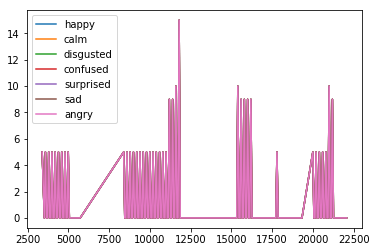

In [69]:
plt.plot(list(map(int, timestamp_happy_count_dict.keys())), timestamp_happy_count_dict.values(),
         list(map(int, timestamp_calm_count_dict.keys())), timestamp_calm_count_dict.values(),
        list(map(int, timestamp_disgusted_count_dict.keys())), timestamp_disgusted_count_dict.values(),
        list(map(int, timestamp_confused_count_dict.keys())), timestamp_confused_count_dict.values(),
        list(map(int, timestamp_surprised_count_dict.keys())), timestamp_surprised_count_dict.values(),
        list(map(int, timestamp_sad_count_dict.keys())), timestamp_sad_count_dict.values(),
        list(map(int, timestamp_angry_count_dict.keys())), timestamp_angry_count_dict.values())
plt.legend(['happy', 'calm', 'disgusted', 'confused', 'surprised', 'sad', 'angry'])

# Plotly animation plots

In [106]:
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML

import pandas as pd

init_notebook_mode(connected=True)

# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

# fill in most of layout
figure['layout']['xaxis'] = {'title': 'Timestamp'}
figure['layout']['yaxis'] = {'title': 'Count'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': 3399,
    'plotlycommand': 'animate',
    'values': years,
    'visible': True
}
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Timestamp:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

# make data
initial_timestamp = 0
timestamps = timestamp_face_count_dict.keys()
moods = ['happy', 'calm', 'disgusted', 'confused', 'surprised', 'sad', 'angry']
dataset = {'happy': timestamp_happy_count_dict, 
           'calm' : timestamp_calm_count_dict,
           'disgusted' : timestamp_disgusted_count_dict,
           'confused' : timestamp_confused_count_dict,
           'surprised' : timestamp_surprised_count_dict,
           'sad' : timestamp_sad_count_dict,
           'angry' :timestamp_angry_count_dict
          }
for mood in moods:

    data_dict = {
        'x': initial_timestamp,
        'y': dataset[mood][initial_timestamp],
        'mode': 'markers',
        'text': dataset[mood][initial_timestamp],
        'marker': {
            'sizemode': 'area',
            'sizeref': 200000,
            'size': dataset[mood][initial_timestamp]
        },
        'name': mood
    }
    figure['data'].append(data_dict)
    
# make frames
for timestamp in timestamps:
    frame = {'data': [], 'name': str(timestamp)}
    for mood in moods:
        data_dict = {
        'x': timestamp,
        'y': dataset[mood][timestamp],
        'mode': 'markers',
        'text': dataset[mood][timestamp],
        'marker': {
            'sizemode': 'area',
            'sizeref': 200000,
            'size': dataset[mood][timestamp]
        },
        'name': mood
    }
        frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': timestamp,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
figure['layout']['sliders'] = [sliders_dict]

iplot(figure)